#Miniproyecto 1 - Análisis multivariado

**Autores:**  

*   Juan José Torres Patiño
*   Juan Diego Sánchez Ramos

**Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

## Librerías

In [ ]:
import scipy.io as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import welch
from scipy.signal import find_peaks

#Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Datos

## Cargar matrices

In [ ]:
datosP1 = sc.loadmat("/content/drive/MyDrive/Audios_TDS3/MiniP/s14.mat")
datosP2 = sc.loadmat("/content/drive/MyDrive/Audios_TDS3/MiniP/s15.mat")
datosP3 = sc.loadmat("/content/drive/MyDrive/Audios_TDS3/MiniP/s16.mat")
datosP4 = sc.loadmat("/content/drive/MyDrive/Audios_TDS3/MiniP/s17.mat")

## División entre Labels y Datos de la Señal

In [ ]:
signalsP1 = datosP1['data']
etiquetasP1 = datosP1['labels']

signalsP2 = datosP2['data']
etiquetasP2 = datosP2['labels']

signalsP3 = datosP3['data']
etiquetasP3 = datosP3['labels']

signalsP4 = datosP4['data']
etiquetasP4 = datosP4['labels']

# 2. Características

## Gráficas

In [ ]:
#Gráficas
def graficaP(x1, x2, x3, x4, nombre, color1, color2, color3, color4):
  plt.figure(figsize=(10,6))
  plt.subplot(2,2,1)
  plt.plot(x1, color1)
  plt.title(f'{nombre} 1')

  plt.subplot(2,2,2)
  plt.plot(x2, color2)
  plt.title(f'{nombre} 2')

  plt.subplot(2,2,3)
  plt.plot(x3, color3)
  plt.title(f'{nombre} 3')

  plt.subplot(2,2,4)
  plt.plot(x4, color4)
  plt.title(f'{nombre} 4')

  plt.tight_layout()
  plt.show()

## Respuesta Galbánica

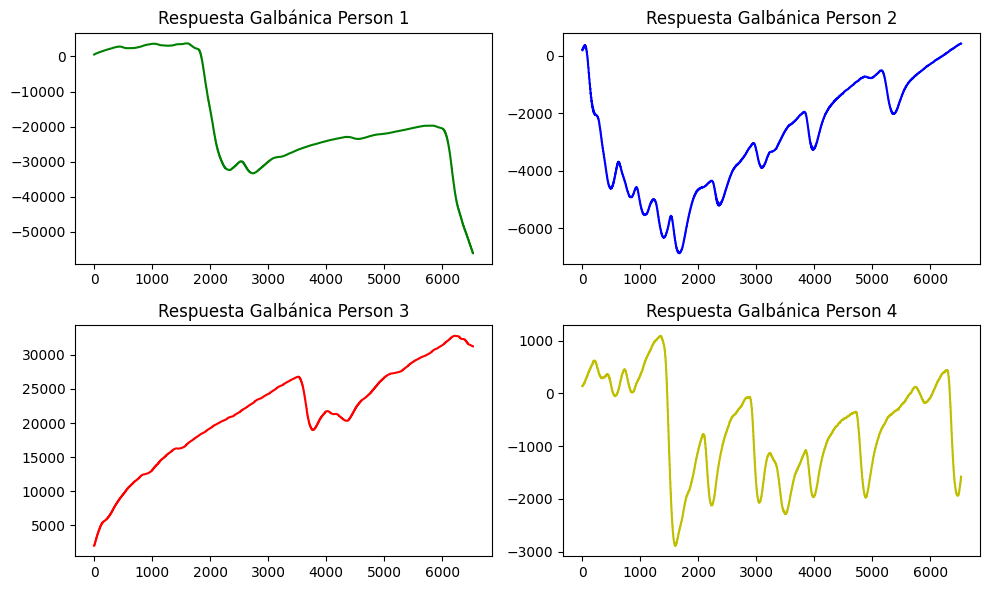

In [ ]:
GSR_P1 = signalsP1[0,36,:]
GSR_P2 = signalsP2[0,36,:]
GSR_P3 = signalsP3[0,36,:]
GSR_P4 = signalsP4[0,36,:]

graficaP(GSR_P1, GSR_P2, GSR_P3, GSR_P4,'Respuesta Galbánica Person', 'g', 'b', 'r', 'y')

## Presión Sanguínea

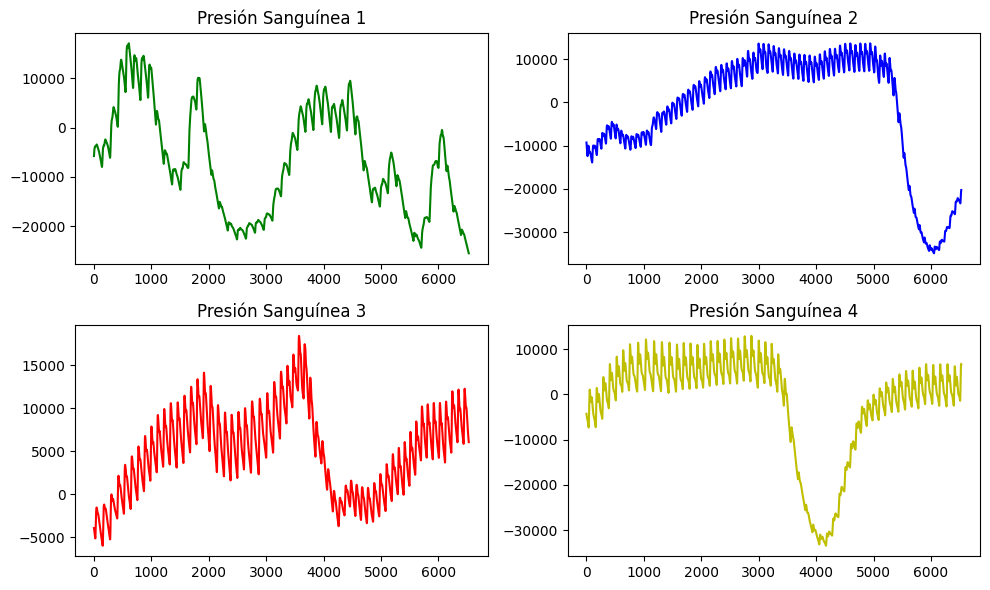

In [ ]:
BVP_P1 = signalsP1[0,38,:]
BVP_P2 = signalsP2[0,38,:]
BVP_P3 = signalsP3[0,38,:]
BVP_P4 = signalsP4[0,38,:]

graficaP(BVP_P1, BVP_P2, BVP_P3, BVP_P4,'Presión Sanguínea', 'g', 'b', 'r', 'y')

## Respiración

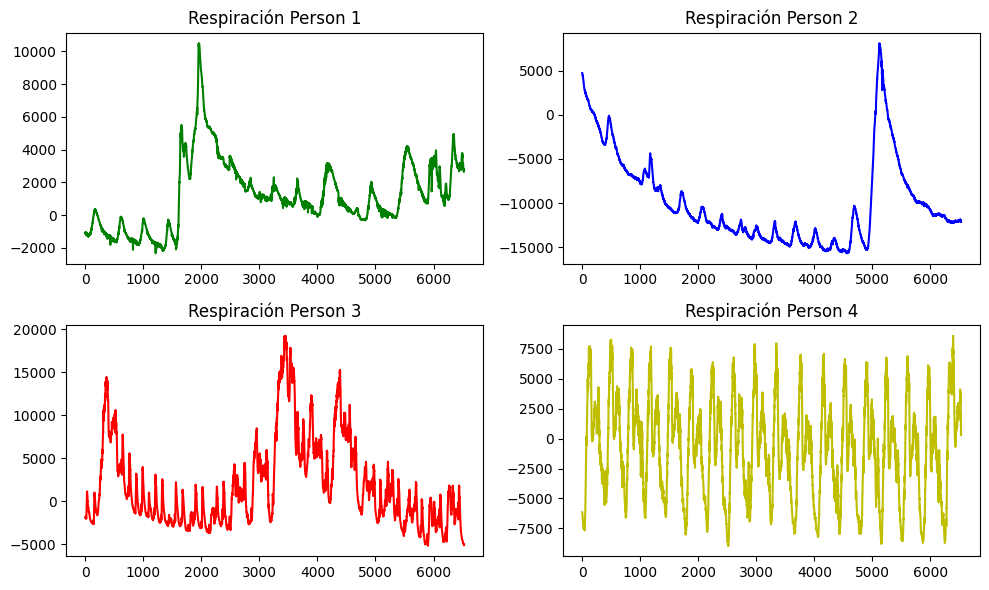

In [ ]:
R_P1 = signalsP1[0,37,:]
R_P2 = signalsP2[0,37,:]
R_P3 = signalsP3[0,37,:]
R_P4 = signalsP4[0,37,:]

graficaP(R_P1, R_P2, R_P3, R_P4,'Respiración Person', 'g', 'b', 'r', 'y')

## Temperatura de la Piel

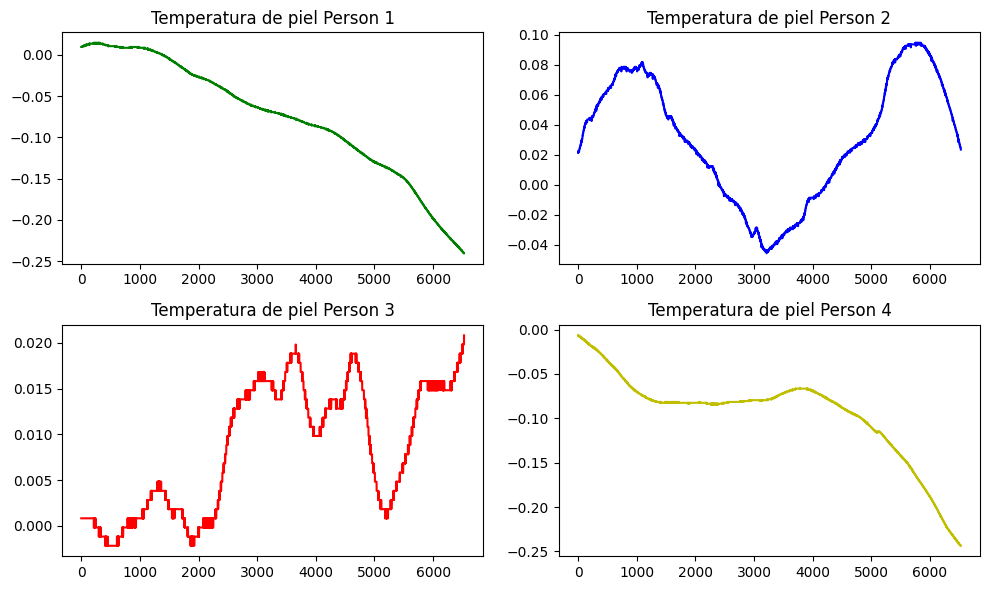

In [ ]:
ST_P1 = signalsP1[0,39,:]
ST_P2 = signalsP2[0,39,:]
ST_P3 = signalsP3[0,39,:]
ST_P4 = signalsP4[0,39,:]

graficaP(ST_P1, ST_P2, ST_P3, ST_P4,'Temperatura de piel Person', 'g', 'b', 'r', 'y')

## Ojos

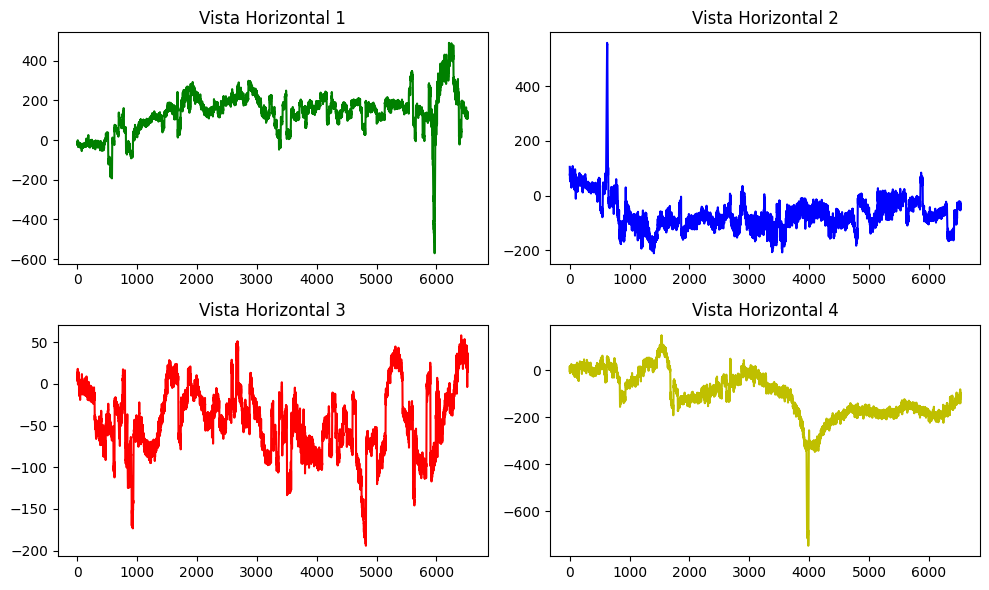

In [ ]:
hEOG_P1 = signalsP1[0,32,:]
hEOG_P2 = signalsP2[0,32,:]
hEOG_P3 = signalsP3[0,32,:]
hEOG_P4 = signalsP4[0,32,:]

graficaP(hEOG_P1, hEOG_P2, hEOG_P3, hEOG_P4,'Vista Horizontal', 'g', 'b', 'r', 'y')

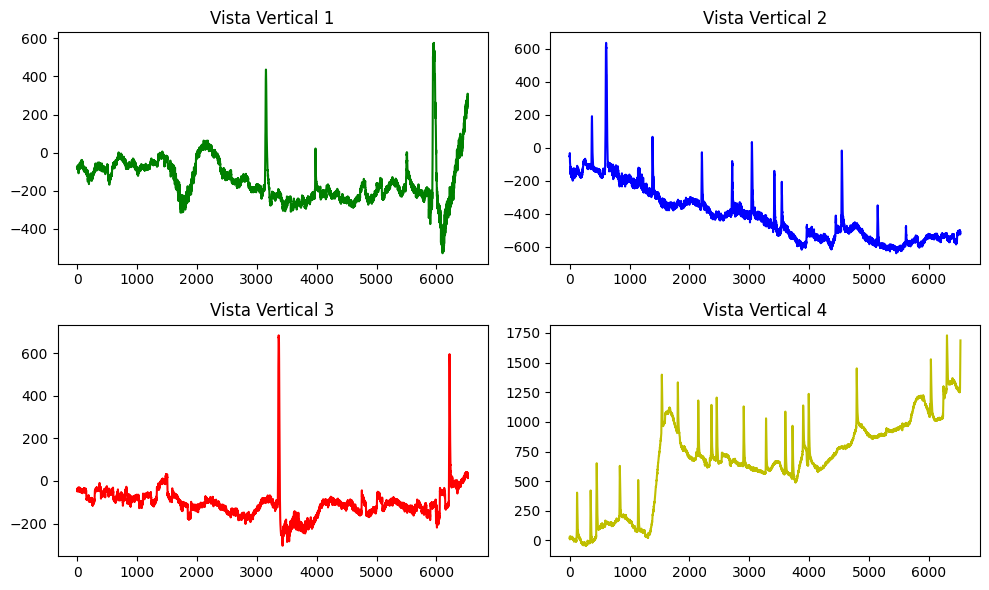

In [ ]:
vEOG_P1 = signalsP1[0,33,:]
vEOG_P2 = signalsP2[0,33,:]
vEOG_P3 = signalsP3[0,33,:]
vEOG_P4 = signalsP4[0,33,:]

graficaP(vEOG_P1, vEOG_P2, vEOG_P3, vEOG_P4,'Vista Vertical', 'g', 'b', 'r', 'y')

## Mejillas

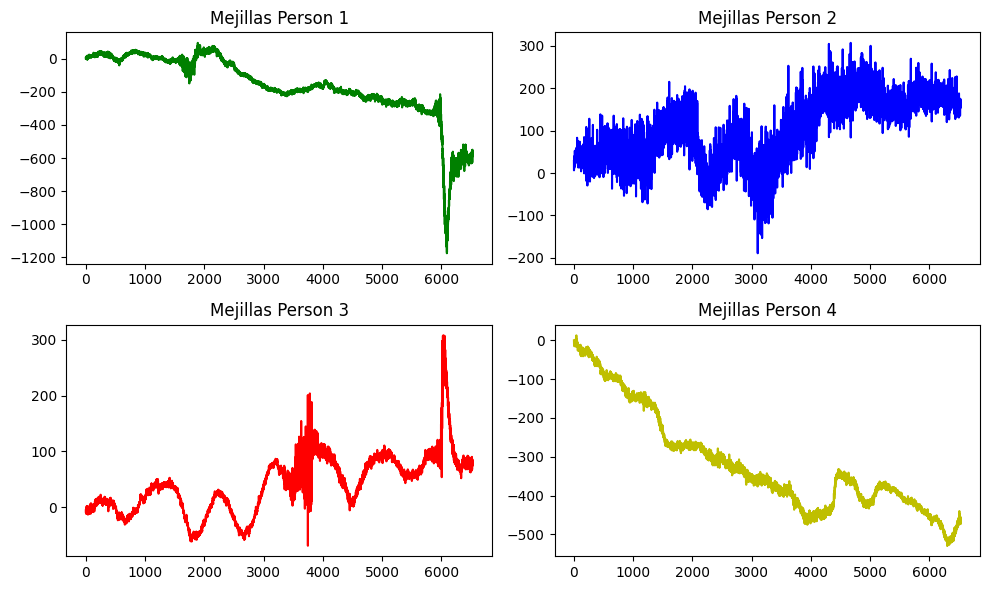

In [ ]:
zEMG_P1 = signalsP1[0,34,:]
zEMG_P2 = signalsP2[0,34,:]
zEMG_P3 = signalsP3[0,34,:]
zEMG_P4 = signalsP4[0,34,:]

graficaP(zEMG_P1, zEMG_P2, zEMG_P3, zEMG_P4,'Mejillas Person', 'g', 'b', 'r', 'y')

## Espalda

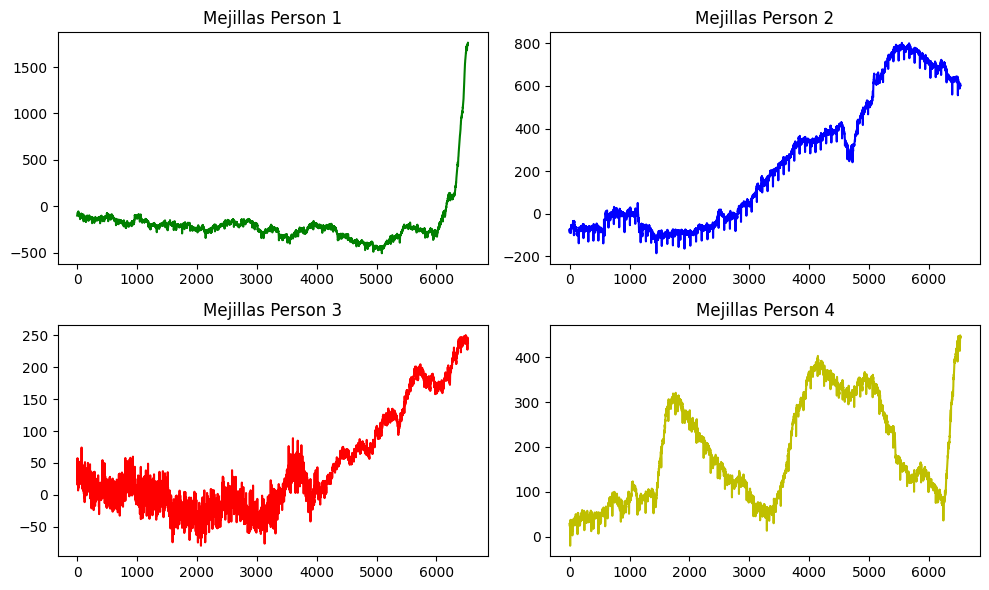

In [ ]:
tEMG_P1 = signalsP1[0,35,:]
tEMG_P2 = signalsP2[0,35,:]
tEMG_P3 = signalsP3[0,35,:]
tEMG_P4 = signalsP4[0,35,:]

graficaP(tEMG_P1, tEMG_P2, tEMG_P3, tEMG_P4,'Mejillas Person', 'g', 'b', 'r', 'y')

# 3. Definición de etiquetas

## Persona 1

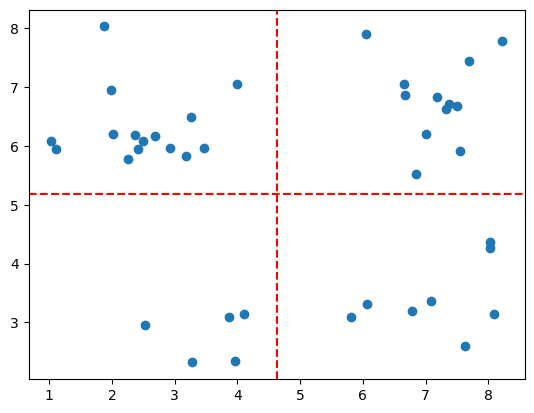

In [ ]:
arousal = etiquetasP1[:,1]
valence = etiquetasP1[:,0]
emocion_P1 = np.zeros(np.size(arousal))
emocion_P1[valence<=4] = 0
emocion_P1[np.logical_and(valence>4 ,valence<=7)] = 1
emocion_P1[valence>7] = 2

plt.scatter(valence,arousal)

# Dibujar línea vertical en el punto medio del eje x
x_mid = (plt.xlim()[0] + plt.xlim()[1]) / 2
plt.axvline(x=x_mid, color='red', linestyle='--')

# Dibujar línea horizontal en el punto medio del eje y
y_mid = (plt.ylim()[0] + plt.ylim()[1]) / 2
plt.axhline(y=y_mid, color='red', linestyle='--')

plt.show()

## Persona 2

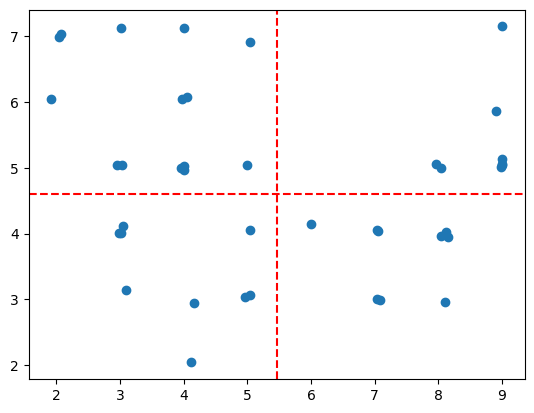

In [ ]:
arousal = etiquetasP2[:,1]
valence = etiquetasP2[:,0]
emocion_P2 = np.zeros(np.size(arousal))
emocion_P2[valence<=4] = 0
emocion_P2[np.logical_and(valence>4 ,valence<=7)] = 1
emocion_P2[valence>7] = 2

plt.scatter(valence,arousal)

# Dibujar línea vertical en el punto medio del eje x
x_mid = (plt.xlim()[0] + plt.xlim()[1]) / 2
plt.axvline(x=x_mid, color='red', linestyle='--')

# Dibujar línea horizontal en el punto medio del eje y
y_mid = (plt.ylim()[0] + plt.ylim()[1]) / 2
plt.axhline(y=y_mid, color='red', linestyle='--')

plt.show()

## Persona 3

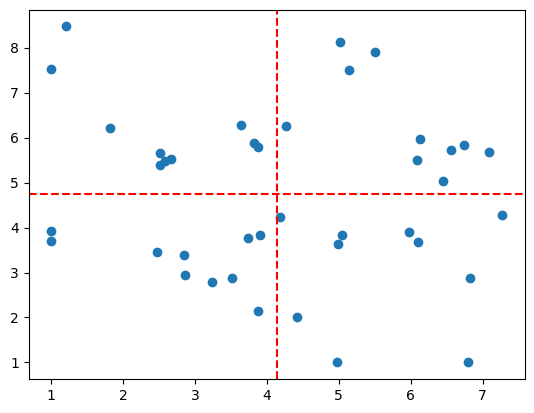

In [ ]:
arousal = etiquetasP3[:,1]
valence = etiquetasP3[:,0]
emocion_P3 = np.zeros(np.size(arousal))
emocion_P3[valence<=4] = 0
emocion_P3[np.logical_and(valence>4 ,valence<=7)] = 1
emocion_P3[valence>7] = 2

plt.scatter(valence,arousal)

# Dibujar línea vertical en el punto medio del eje x
x_mid = (plt.xlim()[0] + plt.xlim()[1]) / 2
plt.axvline(x=x_mid, color='red', linestyle='--')

# Dibujar línea horizontal en el punto medio del eje y
y_mid = (plt.ylim()[0] + plt.ylim()[1]) / 2
plt.axhline(y=y_mid, color='red', linestyle='--')

plt.show()

## Persona 4

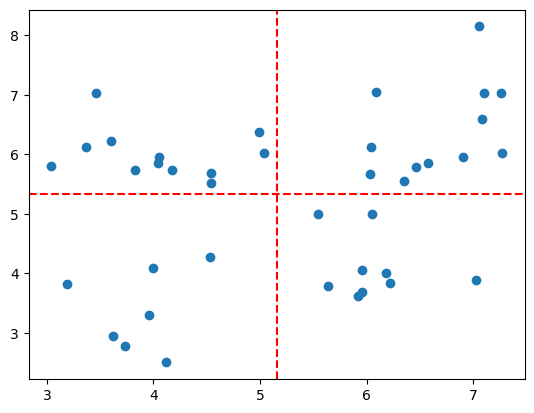

In [ ]:
arousal = etiquetasP4[:,1]
valence = etiquetasP4[:,0]
emocion_P4 = np.zeros(np.size(arousal))
emocion_P4[valence<=4] = 0
emocion_P4[np.logical_and(valence>4 ,valence<=7)] = 1
emocion_P4[valence>7] = 2

plt.scatter(valence,arousal)

# Dibujar línea vertical en el punto medio del eje x
x_mid = (plt.xlim()[0] + plt.xlim()[1]) / 2
plt.axvline(x=x_mid, color='red', linestyle='--')

# Dibujar línea horizontal en el punto medio del eje y
y_mid = (plt.ylim()[0] + plt.ylim()[1]) / 2
plt.axhline(y=y_mid, color='red', linestyle='--')

plt.show()

#4. Extracción de características

## Normalización

In [ ]:
def normalizar(x):
  normi = (x-np.max(x))/(np.max(x)-np.min(x))
  return normi

In [ ]:
GSRn_P1 = normalizar(signalsP1[0,36,:])
GSRn_P2 = normalizar(signalsP2[0,36,:])
GSRn_P3 = normalizar(signalsP3[0,36,:])
GSRn_P4 = normalizar(signalsP4[0,36,:])

In [ ]:
BVPn_P1 = normalizar(signalsP1[0,38,:])
BVPn_P2 = normalizar(signalsP2[0,38,:])
BVPn_P3 = normalizar(signalsP3[0,38,:])
BVPn_P4 = normalizar(signalsP4[0,38,:])

In [ ]:
Rn_P1 = normalizar(signalsP1[0,37,:])
Rn_P2 = normalizar(signalsP2[0,37,:])
Rn_P3 = normalizar(signalsP3[0,37,:])
Rn_P4 = normalizar(signalsP4[0,37,:])

In [ ]:
STn_P1 = normalizar(signalsP1[0,39,:])
STn_P2 = normalizar(signalsP2[0,39,:])
STn_P3 = normalizar(signalsP3[0,39,:])
STn_P4 = normalizar(signalsP4[0,39,:])

In [ ]:
hEOGn_P1 = normalizar(signalsP1[0,32,:])
hEOGn_P2 = normalizar(signalsP2[0,32,:])
hEOGn_P3 = normalizar(signalsP3[0,32,:])
hEOGn_P4 = normalizar(signalsP4[0,32,:])

In [ ]:
vEOGn_P1 = normalizar(signalsP1[0,33,:])
vEOGn_P2 = normalizar(signalsP2[0,33,:])
vEOGn_P3 = normalizar(signalsP3[0,33,:])
vEOGn_P4 = normalizar(signalsP4[0,33,:])

In [ ]:
zEMGn_P1 = normalizar(signalsP1[0,34,:])
zEMGn_P2 = normalizar(signalsP2[0,34,:])
zEMGn_P3 = normalizar(signalsP3[0,34,:])
zEMGn_P4 = normalizar(signalsP4[0,34,:])

In [ ]:
tEMGn_P1 = normalizar(signalsP1[0,35,:])
tEMGn_P2 = normalizar(signalsP2[0,35,:])
tEMGn_P3 = normalizar(signalsP3[0,35,:])
tEMGn_P4 = normalizar(signalsP4[0,35,:])

## Persona 1

### GSR

#### Average Skin Resistance, Average of derivate for negative values only, 10 spectral power in the [0-2.4]Hz bands.

In [ ]:
def calcular_trescosas_GSR(gsr_signal, fs=128):

    #Promedio
    AverageSkinGSR = np.mean(gsr_signal)

    # Aplicar la transformada de Fourier
    fft_result = np.fft.fft(gsr_signal)
    fft_freqs = np.fft.fftfreq(len(gsr_signal), 1 / fs)
    power_spectrum = np.abs(fft_result) ** 2

    # Filtrar las frecuencias en la banda de 0-2.4 Hz
    low_cutoff = 0  # Hz
    high_cutoff = 2.4  # Hz

    indices_band = np.where((fft_freqs >= low_cutoff) & (fft_freqs <= high_cutoff))[0]

    # Ordenar las frecuencias por amplitud
    sorted_indices = np.argsort(np.abs(fft_result[indices_band]))[::-1]

    # Obtener las 10 frecuencias principales en la banda de interés
    top_10_freqs = fft_freqs[indices_band][sorted_indices][:10]
    top_10_powers = power_spectrum[indices_band][sorted_indices][:10]

    valoresneg = gsr_signal[gsr_signal < 0]
    derivada = np.diff(valoresneg)
    promedio = np.mean(derivada)

    TrescosasGSR = np.array([AverageSkinGSR, promedio, top_10_freqs, top_10_powers], dtype=object)

    return TrescosasGSR

In [ ]:
calcular_trescosas_GSR(GSR_P1)

array([-18005.683434555966, -11.957540568865216,
       array([0.        , 0.01960784, 0.03921569, 0.09803922, 0.05882353,
              0.15686275, 0.11764706, 0.07843137, 0.17647059, 0.21568627]),
       array([1.38159105e+16, 1.68349252e+15, 1.40643367e+15, 3.37931526e+14,
              2.22184623e+14, 1.44619651e+14, 1.41264234e+14, 1.14274093e+14,
              8.95787363e+13, 6.15088837e+13])                               ],
      dtype=object)

### Presión Sanguínea

#### Average and standar deviation of HR, Spectra power in the bands ([0.1-0.2]Hz, [0.2-0.3]Hz, [0.3-0.4]Hz).

In [ ]:
import numpy as np

def calcular_trescosas_BVP(bvp_signal, low_cutoff, high_cutoff, fs=128):

    #Promedio
    AveragePS = np.mean(bvp_signal)

    #Desviación estándar
    DS = np.std(bvp_signal)

    # Aplicar la transformada de Fourier
    fft_result = np.fft.fft(bvp_signal)
    fft_freqs = np.fft.fftfreq(len(bvp_signal), 1 / fs)
    power_spectrum = np.abs(fft_result) ** 2

    # Filtrar las frecuencias en el rango de [low_cutoff, high_cutoff] Hz
    indices_range = np.where((fft_freqs >= low_cutoff) & (fft_freqs <= high_cutoff))[0]

    # Calcular la potencia en el rango de [low_cutoff, high_cutoff] Hz
    power_in_range = np.sum(power_spectrum[indices_range])

    TrescosasBVP = np.array([AveragePS, DS, power_in_range])

    return TrescosasBVP

In [ ]:
calcular_trescosas_BVP(BVP_P1, low_cutoff=0.1, high_cutoff=0.2)

array([-6.47525505e+03,  1.06450444e+04,  3.49898940e+14])

### Respiración

#### Average respiration signal, Breathing rate, 10 spectral power in the bands from 0 to 2.4 Hz.

In [ ]:
def calcular_trescosas_ST(respiratory_signal, fs=128):

    #Promedio
    AverageRS = np.mean(respiratory_signal)

    # Encuentra los máximos y mínimos locales de la señal de respiración.
    peaks_max, _ = find_peaks(respiratory_signal, height=0.0)
    peaks_min, _ = find_peaks(-respiratory_signal, height=0.0)

    # Combina los picos máximos y mínimos en una sola lista.
    all_peaks = np.sort(np.concatenate((peaks_max, peaks_min)))

    # Calcula el período (intervalo de tiempo) entre picos consecutivos.
    periods = np.diff(all_peaks) / fs

    # Calcula la frecuencia respiratoria como la inversa del período promedio.
    respiratory_rate = 60 / np.mean(periods)

    f,p = calcular_frecuencias_y_potencias_gsr(R_P1)

    TrescosasST = np.array([AverageRS, respiratory_rate, f,p], dtype=object)

    return TrescosasST

In [ ]:
calcular_trescosas_ST(R_P1)

array([1236.9113365895369, 1751.6615573267932,
       array([0.        , 0.03921569, 0.05882353, 0.01960784, 0.11764706,
              0.09803922, 0.17647059, 0.07843137, 0.29411765, 0.35294118]),
       array([6.51984741e+13, 3.43403597e+13, 2.06654783e+13, 7.21431204e+12,
              4.97563053e+12, 4.05848719e+12, 3.06491446e+12, 3.04145719e+12,
              2.60608765e+12, 1.66781592e+12])                               ],
      dtype=object)

### Temperatura

#### Average, Average of its derivative, Spectral power in the bands ([0-0.1Hz],[0.1-0.2]Hz).

#### Average of its derivative

In [ ]:
# Calcula la derivada de los valores negativos
def calcular_trescosas_T(T_signal, fs=128):

  #Promedio
  AverageSkinT = np.mean(T_signal)

  #Derivada
  derivadaT = np.diff(T_signal)

# Calcula el promedio de la derivada
  promedioDerivada = np.mean(derivadaT)

  #Potencia
  fft_result = np.fft.fft(T_signal)
  fft_freqs = np.fft.fftfreq(len(T_signal), 1 / fs)

  # Definir las bandas de frecuencia de interés
  low_cutoff_1 = 0  # Hz
  high_cutoff_1 = 0.1  # Hz

  low_cutoff_2 = 0.1  # Hz
  high_cutoff_2 = 0.2  # Hz

  # Encontrar los índices de las frecuencias en las dos bandas de interés
  indices_band_1 = np.where((fft_freqs >= low_cutoff_1) & (fft_freqs <= high_cutoff_1))[0]
  indices_band_2 = np.where((fft_freqs >= low_cutoff_2) & (fft_freqs <= high_cutoff_2))[0]

  # Calcular la potencia espectral en las dos bandas de frecuencia
  power_spectrum_1 = np.abs(fft_result[indices_band_1]) ** 2
  power_spectrum_2 = np.abs(fft_result[indices_band_2]) ** 2

  # Sumar la potencia en ambas bandas para obtener la potencia total
  total_power = np.sum(power_spectrum_1) + np.sum(power_spectrum_2)

  TrescosasT = np.array([AverageSkinT, promedioDerivada, total_power])
  return TrescosasT

In [ ]:
calcular_trescosas_T(ST_P1)

array([-7.54408224e-02, -3.83019452e-05,  3.42245782e+05])